English_Malayalam_Multimodal_Machine_Translation 



In [1]:

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os
import cv2
import matplotlib.image as mp

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Training data preprocessing

In [3]:
with open('/content/drive/My Drive/Main/train.mn.txt') as file:
    train_mal_txt = file.read().split('\n')
with open('/content/drive/My Drive/Main/train.en.txt') as file:
    train_eng_txt = file.read().split('\n')
with open('/content/drive/My Drive/Main/train_images.txt') as file:
    train_images = file.read().split('\n')


In [4]:
print(len(train_mal_txt))
print(len(train_eng_txt))

28932
28933


In [5]:
train_mal_txt.pop()
train_eng_txt.pop()
train_eng_txt.pop()

'\t\t\t\t\t\t'

In [6]:
print(len(train_mal_txt))
print(len(train_eng_txt))

28931
28931


In [7]:
print(train_mal_txt[-1])
print(train_eng_txt[-1])

ഒരു ട്രെയിനിന്റെ ഇടത് ടെയിൽ ലൈറ്റ്
a train's left tail light						


In [8]:
#Datacleaning by removing special characters
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r" ᠃", "", text)
    text = re.sub(r" ᠂", "", text)
    text = re.sub(r"-", " ", text)
    text = re.sub(r"<5>", "5", text)
    text = re.sub(r"“ ", "", text)
    text = re.sub(r" ”", "", text)
    text = re.sub(r"[+\.\!\/_,$%^*(+\"\']+|[+——！，〈〉《》。︱？?、．％~@#￥%……&*（）’]", "", text)
    text=text.rstrip()
    return text

In [9]:
with open('/content/drive/My Drive/Main/maltest.txt') as file:
   test_mal_txt = file.read().split('\n')
with open('/content/drive/My Drive/Main/engtest.txt') as file:
   test_eng_txt = file.read().split('\n')
with open('/content/drive/My Drive/Main/testimages.txt') as file:
    test_images = file.read().split('\n')

In [10]:
def remove(mal_txt,eng_txt):
        mal_txt.pop()
        eng_txt.pop()
        eng_txt.pop()
        #trainimages.pop()
        #trainimages,link
        print(len(mal_txt))
        print(len(eng_txt))
        #print(len(trainimages))
        #img_path=[]
        #for s in trainimages:
                 #img_path.append(link+s)
        #return mal_txt,eng_txt,train_images,img_path
        return mal_txt,eng_txt

In [11]:
trmal_df = pd.DataFrame(train_mal_txt, columns=['Malayalam']) 
treng_df = pd.DataFrame(train_eng_txt, columns=['English']) 

In [12]:
trmal_text1 = trmal_df["Malayalam"].apply(clean_text)
treng_text1 = treng_df["English"].apply(clean_text)
trmal_text2 = list(trmal_text1.values)
treng_text2 = list(treng_text1.values)

In [13]:
trmal_temp=[]
for s in trmal_text2:
    trtemp="sos "+s+" eos"
    trmal_temp.append(trtemp)
#text2=[]
trmal_text2=trmal_temp
trmal_text2[1:10]

['sos ഇത് ഒരു ഇൻഡോർ രംഗമാണ് eos',
 'sos കമ്പ്യൂട്ടർ സ്ക്രീനുകൾ ഓണാക്കി eos',
 'sos മനുഷ്യന് ചെറിയ മുടിയുണ്ട് eos',
 'sos ഫോട്ടോ ആൽബം മുതിർന്നവരുടെ മടിയിൽ തുറക്കുന്നു eos',
 'sos കറുത്ത കാറിനടുത്ത് ഒരു കൂട്ടം പെൺകുട്ടികളുണ്ട് eos',
 'sos ഒരു ഉന്തുവണ്ടിയിലെ കുട്ടി eos',
 'sos ഉയരമുള്ള മെറ്റൽ ലൈറ്റ്പോസ്റ്റ് eos',
 'sos മതിൽ വെളുത്ത ചായം പൂശി eos',
 'sos ചാരനിറത്തിലുള്ള റോഡിന്റെ വശങ്ങളിൽ പച്ച പുല്ലിന്റെ സ്ട്രിപ്പുകൾ eos']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


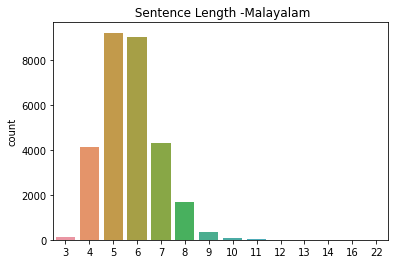

In [14]:
import seaborn as sn
import matplotlib.pyplot as plt
trmalayalam_words = []
for i in trmal_text2:
    trmalayalam_words.append(len(i.split()))
sn.countplot(trmalayalam_words).set(title=' Sentence Length -Malayalam')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


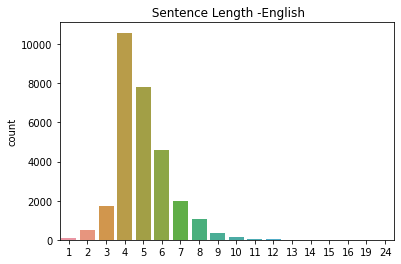

In [15]:
trenglish_words = []
for j in treng_text2:
    trenglish_words.append(len(j.split()))
sn.countplot(trenglish_words).set(title=' Sentence Length -English')
plt.show()

In [16]:
trmaxlen_malayalam = max(trmalayalam_words)
trmaxlen_english = max(trenglish_words)
print('Maximum sentence length-Malayalam :',trmaxlen_malayalam)
print('Maximum sentence length-English :',trmaxlen_english)

Maximum sentence length-Malayalam : 22
Maximum sentence length-English : 24


Validation Data Preprocessing

In [17]:
with open('/content/drive/My Drive/Main/maldev.txt') as file:
    dev_mal_txt = file.read().split('\n')
with open('/content/drive/My Drive/Main/endev.txt') as file:
    dev_eng_txt = file.read().split('\n')
with open('/content/drive/My Drive/Main/devimage.txt') as file:
    dev_images = file.read().split('\n')

In [18]:
print(len(dev_mal_txt))
print(len(dev_eng_txt))

999
1000


In [19]:
print(dev_mal_txt[-2])
print(dev_eng_txt[-2])

റാക്കറ്റ് പിടിച്ചിരിക്കുന്ന മനുഷ്യൻ	
						


In [20]:
dev_mal_txt.pop()
dev_eng_txt.pop()

''

In [21]:
dev_eng_txt.pop()

'\t\t\t\t\t\t'

In [22]:
print(len(dev_mal_txt))
print(len(dev_eng_txt))

998
998


In [23]:
dmal_df = pd.DataFrame(dev_mal_txt, columns=['Malayalam']) 
deng_df = pd.DataFrame(dev_eng_txt, columns=['English']) 

In [24]:
dmal_text1 = dmal_df["Malayalam"].apply(clean_text)
deng_text1 = deng_df["English"].apply(clean_text)
dmal_text2 = list(dmal_text1.values)
deng_text2 = list(deng_text1.values)

In [25]:
dmal_temp=[]
for s in dmal_text2:
    dtemp="sos "+s+" eos"
    dmal_temp.append(dtemp)
#text2=[]
dmal_text2=dmal_temp
dmal_text2[1:10]

['sos ഒരു കെട്ടിടത്തിന്റെ വിൻഡോ eos',
 'sos ഡ്രോയറുകളുള്ള ഇരുണ്ട ചാരനിറത്തിലുള്ള കമ്പ്യൂട്ടർ ഡെസ്ക് eos',
 'sos നിലത്ത് നാല് കാലുകളുള്ള ഉരുക്ക് കസേര eos',
 'sos തെരുവിൽ സൈക്കിൾ ചവിട്ടുന്ന മനുഷ്യൻ eos',
 'sos ഈ കാറുകൾ അഴുക്കിൽ പാർക്ക് ചെയ്തിരിക്കുന്നു eos',
 'sos ആകാശത്ത് വെളുത്ത മേഘങ്ങൾ eos',
 'sos ഗ്ലാസ് വാതിലുകളുടെ ഗണം eos',
 'sos പ്രൊജക്ടർ സ്ക്രീൻ ചുരുട്ടി വെച്ചിരിക്കുന്നു eos',
 'sos ചാരനിറത്തിലുള്ള സ്വെറ്റർ ധരിച്ച മനുഷ്യൻ eos']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


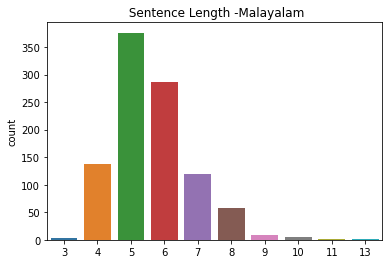

In [26]:
import seaborn as sn
import matplotlib.pyplot as plt
dmalayalam_words = []
for i in dmal_text2:
    dmalayalam_words.append(len(i.split()))
sn.countplot(dmalayalam_words).set(title=' Sentence Length -Malayalam')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


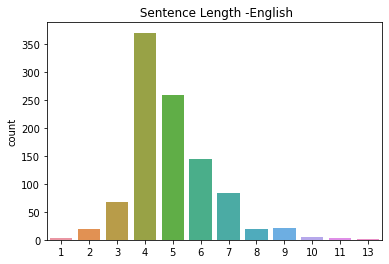

In [27]:
denglish_words = []
for j in deng_text2:
    denglish_words.append(len(j.split()))
sn.countplot(denglish_words).set(title=' Sentence Length -English')
plt.show()

In [28]:
dmaxlen_malayalam = max(dmalayalam_words)
dmaxlen_english = max(denglish_words)
print('Maximum sentence length-Malayalam :',dmaxlen_malayalam)
print('Maximum sentence length-English :',dmaxlen_english)

Maximum sentence length-Malayalam : 13
Maximum sentence length-English : 13


Test data preprocessing

In [81]:
with open('/content/drive/My Drive/Main/maltest.txt') as file:
   test_mal_txt = file.read().split('\n')
with open('/content/drive/My Drive/Main/engtest.txt') as file:
   test_eng_txt = file.read().split('\n')
with open('/content/drive/My Drive/Main/testimages.txt') as file:
    test_images = file.read().split('\n')

In [82]:
print(len(test_mal_txt))
print(len(test_eng_txt))


1401
1401


In [ ]:
test_mal_txt[-2]

'റോഡിൽ ഇംഗ്ലീഷ് സിറ്റി ബസ്'

In [ ]:
test_eng_txt[-2]

'English city bus on the road\t'

In [83]:
test_mal_txt.pop()
test_eng_txt.pop()

''

In [84]:
print(len(test_mal_txt))
print(len(test_eng_txt))


1400
1400


In [85]:
ttmal_df = pd.DataFrame(test_mal_txt, columns=['Malayalam']) 
tteng_df = pd.DataFrame(test_eng_txt, columns=['English']) 

In [86]:
ttmal_text1 = ttmal_df["Malayalam"].apply(clean_text)
tteng_text1 = tteng_df["English"].apply(clean_text)
ttmal_text2 = list(ttmal_text1.values)
tteng_text2 = list(tteng_text1.values)

In [87]:
ttmal_temp=[]
for s in ttmal_text2:
    tttemp="sos "+s+" eos"
    ttmal_temp.append(tttemp)
#text2=[]
ttmal_text2=ttmal_temp
ttmal_text2[1:10]

['sos കത്തികൊണ്ട് കൗണ്ടറിൽ ഇരിക്കുന്ന കത്തി ബ്ലോക്ക് eos',
 'sos ചട്ടിയിൽ രണ്ടാമത്തെ പിസ്സ eos',
 'sos ബീജ് സ്റ്റെയർ വേ രണ്ടാം ലെവലിലേക്ക് പോകുന്നു eos',
 'sos ടാൻ ഹൗസിലെ ഇളം നിറമുള്ള രണ്ടാം നില eos',
 'sos കെട്ടിടങ്ങളുടെ രണ്ടാമത്തെ നിലയിലെ ബാൽക്കണി eos',
 'sos രാത്രി സ്റ്റാന്റിലെ വിളക്ക് കട്ടിലിന്റെ ഇടതുവശത്ത് നിൽക്കുന്നു eos',
 'sos നൈറ്റ് സ്റ്റാൻഡിന് മുകളിൽ ഒരു വെളുത്ത അലാറം ക്ലോക്ക് ഉണ്ട് eos',
 'sos ഒരു കറുത്ത സംഗീത സ്റ്റാൻഡ് eos',
 'sos തെരുവ് മുറിച്ചുകടക്കാൻ കാത്തിരിക്കുന്ന സ്ത്രീ eos']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


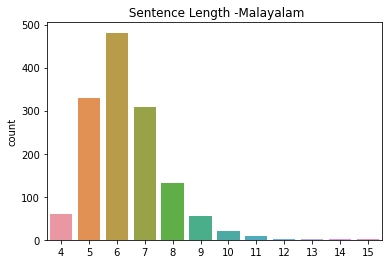

In [88]:
import seaborn as sn
import matplotlib.pyplot as plt
ttmalayalam_words = []
for i in ttmal_text2:
    ttmalayalam_words.append(len(i.split()))
sn.countplot(ttmalayalam_words).set(title=' Sentence Length -Malayalam')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


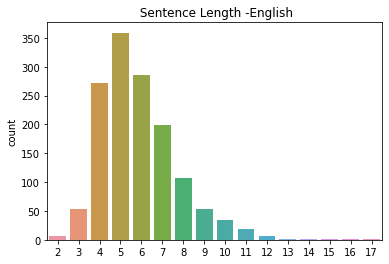

In [89]:
ttenglish_words = []
for j in tteng_text2:
    ttenglish_words.append(len(j.split()))
sn.countplot(ttenglish_words).set(title=' Sentence Length -English')
plt.show()

In [90]:
ttmaxlen_malayalam = max(ttmalayalam_words)
ttmaxlen_english = max(ttenglish_words)
print('Maximum sentence length-Malayalam :',ttmaxlen_malayalam)
print('Maximum sentence length-English :',ttmaxlen_english)

Maximum sentence length-Malayalam : 15
Maximum sentence length-English : 17


In [91]:
x_tt=tteng_text2
y_tt=ttmal_text2

Tokenizing

In [137]:
x_tr=treng_text2
y_tr=trmal_text2
x_val=deng_text2
y_val=dmal_text2


In [138]:
#Tokening the sentences using Keras tokenizer -Malayalam data
from keras.preprocessing.text import Tokenizer
x_tokens = Tokenizer()
x_tokens.fit_on_texts(x_tr)
x_tr = x_tokens.texts_to_sequences(x_tr)
x_val = x_tokens.texts_to_sequences(x_val)
print('x_tr:',x_tr)
print('x_val:',x_val)

x_tr: [[432, 237, 187, 6, 1418, 6, 2, 173], [145, 5, 29, 2227, 252], [146, 1864, 506, 3], [8, 51, 244, 79], [166, 2228, 168, 3, 29, 2987, 688], [238, 5, 1, 135, 4, 419, 449, 2, 10, 59], [157, 6, 1, 977], [118, 109, 2988], [25, 5, 311, 7], [238, 27, 336, 807, 3, 2, 25], [15, 496, 2, 173], [14, 5, 29, 751, 2989], [212, 1035, 440], [2990, 5, 3, 1, 30], [1, 7, 352, 344], [7, 689, 345, 263, 715], [18, 441, 33, 11, 83], [8, 6, 96, 230, 346, 3, 28], [50, 3, 2, 28], [1, 8, 32, 6, 614, 411], [450, 121, 3, 25], [319, 4, 2, 133], [50, 4, 1, 94], [2, 442, 5, 170], [1, 8, 582, 1, 364], [1, 18, 885, 6, 26], [208, 11, 843, 469], [258, 3, 2, 44], [1, 546, 7, 44], [10, 214, 516], [1, 18, 1280, 583, 6, 2, 291, 4, 2, 59], [16, 59, 91, 476, 1, 33], [59, 3, 2, 33], [1419, 1420, 20, 2991], [1, 10, 59, 11, 1, 21, 162], [133, 52, 2, 30], [1, 2229, 53, 3, 1, 242], [85, 337, 4, 1, 28], [50, 3, 1, 28], [17, 30, 32, 3, 60, 4, 1, 108], [108, 208, 5, 3], [1, 21, 41], [425, 4, 2, 76], [663, 69, 181, 2, 28], [844, 10

In [139]:
x_tokens.index_word

{1: 'a',
 2: 'the',
 3: 'on',
 4: 'of',
 5: 'is',
 6: 'in',
 7: 'white',
 8: 'man',
 9: 'and',
 10: 'black',
 11: 'with',
 12: 'red',
 13: 'blue',
 14: 'this',
 15: 'woman',
 16: 'green',
 17: 'brown',
 18: 'person',
 19: 'two',
 20: 'wearing',
 21: 'yellow',
 22: 'sign',
 23: 'train',
 24: 'sky',
 25: 'wall',
 26: 'water',
 27: 'are',
 28: 'building',
 29: 'an',
 30: 'table',
 31: 'people',
 32: 'standing',
 33: 'street',
 34: 'large',
 35: 'tennis',
 36: 'head',
 37: 'sitting',
 38: 'part',
 39: 'clock',
 40: 'dog',
 41: 'bus',
 42: 'small',
 43: 'light',
 44: 'plate',
 45: 'holding',
 46: 'to',
 47: 'cat',
 48: 'grass',
 49: 'shirt',
 50: 'window',
 51: 'has',
 52: 'at',
 53: 'orange',
 54: 'side',
 55: 'ground',
 56: 'plane',
 57: 'bear',
 58: 'boy',
 59: 'car',
 60: 'top',
 61: 'giraffe',
 62: 'girl',
 63: 'playing',
 64: 'road',
 65: 'snow',
 66: 'baseball',
 67: 'horse',
 68: 'field',
 69: 'bench',
 70: 'air',
 71: 'silver',
 72: 'elephant',
 73: 'front',
 74: 'walking',
 75: 'p

In [140]:
reverse_source_word_index=x_tokens.index_word
reverse_source_word_index[2227]

'indoor'

In [141]:
#padding with post (appending zeros at the end to equalize sentence length)
from keras.preprocessing.sequence import pad_sequences
x_tr = pad_sequences(x_tr,maxlen = trmaxlen_english,padding = 'post')
x_val = pad_sequences(x_val,maxlen = trmaxlen_english,padding = 'post')

# +1 for padding 
x_voc_size   =  len(x_tokens.word_index) +1
print("No of unique words in English",x_voc_size)

No of unique words in English 5570


In [142]:
#Tokening the sentences using Keras tokenizer -Malayalam data
from keras.preprocessing.text import Tokenizer
y_tokens = Tokenizer()
y_tokens.fit_on_texts(y_tr)
y_tr = y_tokens.texts_to_sequences(y_tr)
y_val = y_tokens.texts_to_sequences(y_val)
print('x_tr:',y_tr)
print('x_val:',y_val)

x_tr: [[1, 974, 1376, 4856, 1158, 672, 287, 2], [1, 62, 3, 3335, 3336, 2], [1, 147, 2631, 1377, 2], [1, 311, 25, 263, 2], [1, 288, 4857, 4858, 1032, 4859, 2], [1, 4, 4860, 3, 73, 4861, 2], [1, 3, 4862, 79, 2], [1, 119, 160, 4863, 2], [1, 131, 5, 443, 1159, 2], [1, 12, 18, 21, 7, 19, 22, 2], [1, 975, 1378, 6, 2], [1, 27, 1095, 4864, 2], [1, 206, 462, 801, 2], [1, 4865, 3, 4866, 2], [1, 3, 5, 384, 853, 2], [1, 3337, 80, 1096, 1506, 2], [1, 1097, 95, 906, 29, 2], [1, 12, 3338, 8, 432, 1507, 2], [1, 3, 38, 11, 31, 2], [1, 4867, 57, 28, 2], [1, 4868, 134, 224, 2], [1, 976, 360, 2], [1, 3, 38, 11, 31, 2], [1, 802, 71, 2], [1, 3, 4, 26, 14, 2], [1, 3, 29, 69, 1914, 2], [1, 269, 1690, 166, 2], [1, 977, 139, 2], [1, 3, 729, 80, 149, 2], [1, 4, 270, 730, 2], [1, 3, 29, 457, 4869, 1160, 1379, 2], [1, 7, 76, 385, 88, 272, 2], [1, 90, 76, 2], [1, 4870, 2632, 109, 2], [1, 24, 3339, 3, 4, 76, 2], [1, 236, 49, 2], [1, 3, 514, 3, 3340, 37, 2], [1, 3, 111, 70, 1033, 2], [1, 3, 38, 11, 31, 2], [1, 1915, 

In [145]:
target_word_index[2227]

KeyError: ignored

In [144]:
#padding with post (appending zeros at the end to equalize sentence length)
from keras.preprocessing.sequence import pad_sequences
y_tr = pad_sequences(y_tr,maxlen = trmaxlen_malayalam,padding = 'post')
y_val = pad_sequences(y_val,maxlen = trmaxlen_malayalam,padding = 'post')

# +1 for padding 
y_voc_size   =  len(y_tokens.word_index) +1
print("No of unique words in English",y_voc_size)

No of unique words in English 11314


In [131]:
#Tokening the sentences using Keras tokenizer -Malayalam data
from keras.preprocessing.text import Tokenizer
x_tokens = Tokenizer()
x_tokens.fit_on_texts(x_tt)
x_tt = x_tokens.texts_to_sequences(x_tt)
print('x_tt:',x_tt)

AttributeError: ignored

In [93]:
from keras.preprocessing.sequence import pad_sequences
x_tt = pad_sequences(x_tt,maxlen = trmaxlen_english,padding = 'post')

In [94]:

y_tokens = Tokenizer()
y_tokens.fit_on_texts(y_tt)
y_tt = y_tokens.texts_to_sequences(y_tt)

In [95]:
y_tt = pad_sequences(y_tt,maxlen = trmaxlen_english,padding = 'post')

In [36]:
pip install keras-applications

     |████████████████████████████████| 50 kB 2.8 MB/s 


In [37]:
import pandas as pd
import pickle
import numpy as np
import os
import keras
import tensorflow
from keras_applications.resnet import ResNet50
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, GlobalAveragePooling2D,BatchNormalization,Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model
from keras.utils import np_utils
import random
from keras.preprocessing import image, sequence
import matplotlib.pyplot as plt
import keras
from keras import backend as K 
import gensim
from numpy import *
import numpy as np
import pandas as pd 
import re
from tensorflow.keras.applications.vgg16 import VGG16
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings


In [38]:
x_voc=x_voc_size
y_voc=y_voc_size

In [ ]:
x_voc

5570

In [ ]:
y_voc

11314

In [100]:
#Model
x_voc=x_voc_size
y_voc=y_voc_size
latent_dim = 512
embedding_dim=512
#Encoder
encoder_inputs = Input(shape=(trmaxlen_english,))
#The model will take as input an integer matrix of size (batch,input_length)and the largest integer (i.e. word index) in the input
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)
print(encoder_inputs.get_shape)
print(enc_emb.get_shape)

<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, 24) dtype=float32 (created by layer 'input_7')>>
<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, 24, 512) dtype=float32 (created by layer 'embedding_2')>>


In [101]:
#encoder LSTM Layer 1#merge_mode='sum'
encoder_lstm1 = Bidirectional(LSTM(256,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4))
#The dimension of each state equals to the LSTM unit number
encoder_output1= encoder_lstm1(enc_emb)
print(encoder_lstm1.output_shape)


[(None, 24, 512), (None, 256), (None, 256), (None, 256), (None, 256)]


In [102]:
#LSTM layer 2
encoder_lstm2 = keras.layers.wrappers.Bidirectional(LSTM(256,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4))
encoder_output2 = encoder_lstm2(encoder_output1)
print(encoder_lstm2.output_shape)

[(None, 24, 512), (None, 256), (None, 256), (None, 256), (None, 256)]


In [104]:
#layer 3
encoder_lstm3= Bidirectional(LSTM(256, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4), name="encoder_lstm_3")
encoder_outputs, forward_h, forward_c, backward_h, backward_c= encoder_lstm3(encoder_output2)
encoder_states = [forward_h, forward_c, backward_h, backward_c]

In [105]:
state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])

In [106]:
encoder_states =[state_h, state_c]

In [107]:
#Decoder
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))
#embedding layer
dec_emb_layer = Embedding(y_voc, 1024,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)
print(decoder_inputs.get_shape)
print(dec_emb.get_shape)

<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, None) dtype=float32 (created by layer 'input_8')>>
<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, None, 1024) dtype=float32 (created by layer 'embedding_3')>>


In [108]:
#Decoder LSTM layer1
decoder_lstm = LSTM(512, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=encoder_states)
print(decoder_lstm.output_shape)

[(None, None, 512), (None, 512), (None, 512)]


In [45]:
import tensorflow as tf
import os
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import keras
from keras import backend as K
from keras import activations, initializers, regularizers, constraints, metrics
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import (Dense, Dropout, Activation, Flatten, Reshape, Layer,
                          BatchNormalization, LocallyConnected2D,
                          ZeroPadding2D, Conv2D, MaxPooling2D, Conv2DTranspose,
                          GaussianNoise, UpSampling2D, Input)
#from keras.utils import conv_utils, multi_gpu_model
from keras.layers import Lambda
#from keras.engine import Layer, InputSpec
#from keras.legacy import interfaces

In [47]:
class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state
            inputs: (batchsize * 1 * de_in_dim)
            states: (batchsize * 1 * de_latent_dim)
            """

            assert_msg = "States must be an iterable. Got {} of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch size * en_seq_len * latent_dim
            W_a_dot_s = K.dot(encoder_out_seq, self.W_a)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>', U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            Ws_plus_Uh = K.tanh(W_a_dot_s + U_a_dot_h)
            if verbose:
                print('Ws+Uh>', Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.squeeze(K.dot(Ws_plus_Uh, self.V_a), axis=-1)
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """

            assert_msg = "States must be an iterable. Got {} of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        fake_state_c = K.sum(encoder_out_seq, axis=1)
        fake_state_e = K.sum(encoder_out_seq, axis=2)  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [109]:
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

In [110]:
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

In [111]:
#dense = Dense(fr_vsize, activation='softmax', name='softmax_layer')
#dense_time = TimeDistributed(dense, name='time_distributed_layer')
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)
#decoder_output = dense_time(decoder_concat_input)
print(decoder_dense.output_shape)

(None, None, 11314)


In [112]:
model = Model([encoder_inputs,decoder_inputs], decoder_outputs)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 24)]         0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 24, 512)      2851840     ['input_7[0][0]']                
                                                                                                  
 bidirectional_1 (Bidirectional  [(None, 24, 512),   1574912     ['embedding_2[0][0]']            
 )                               (None, 256),                                                     
                                 (None, 256),                                                     
                                 (None, 256),                                               

In [113]:
from keras.utils.vis_utils import plot_model
import tensorflow as tf

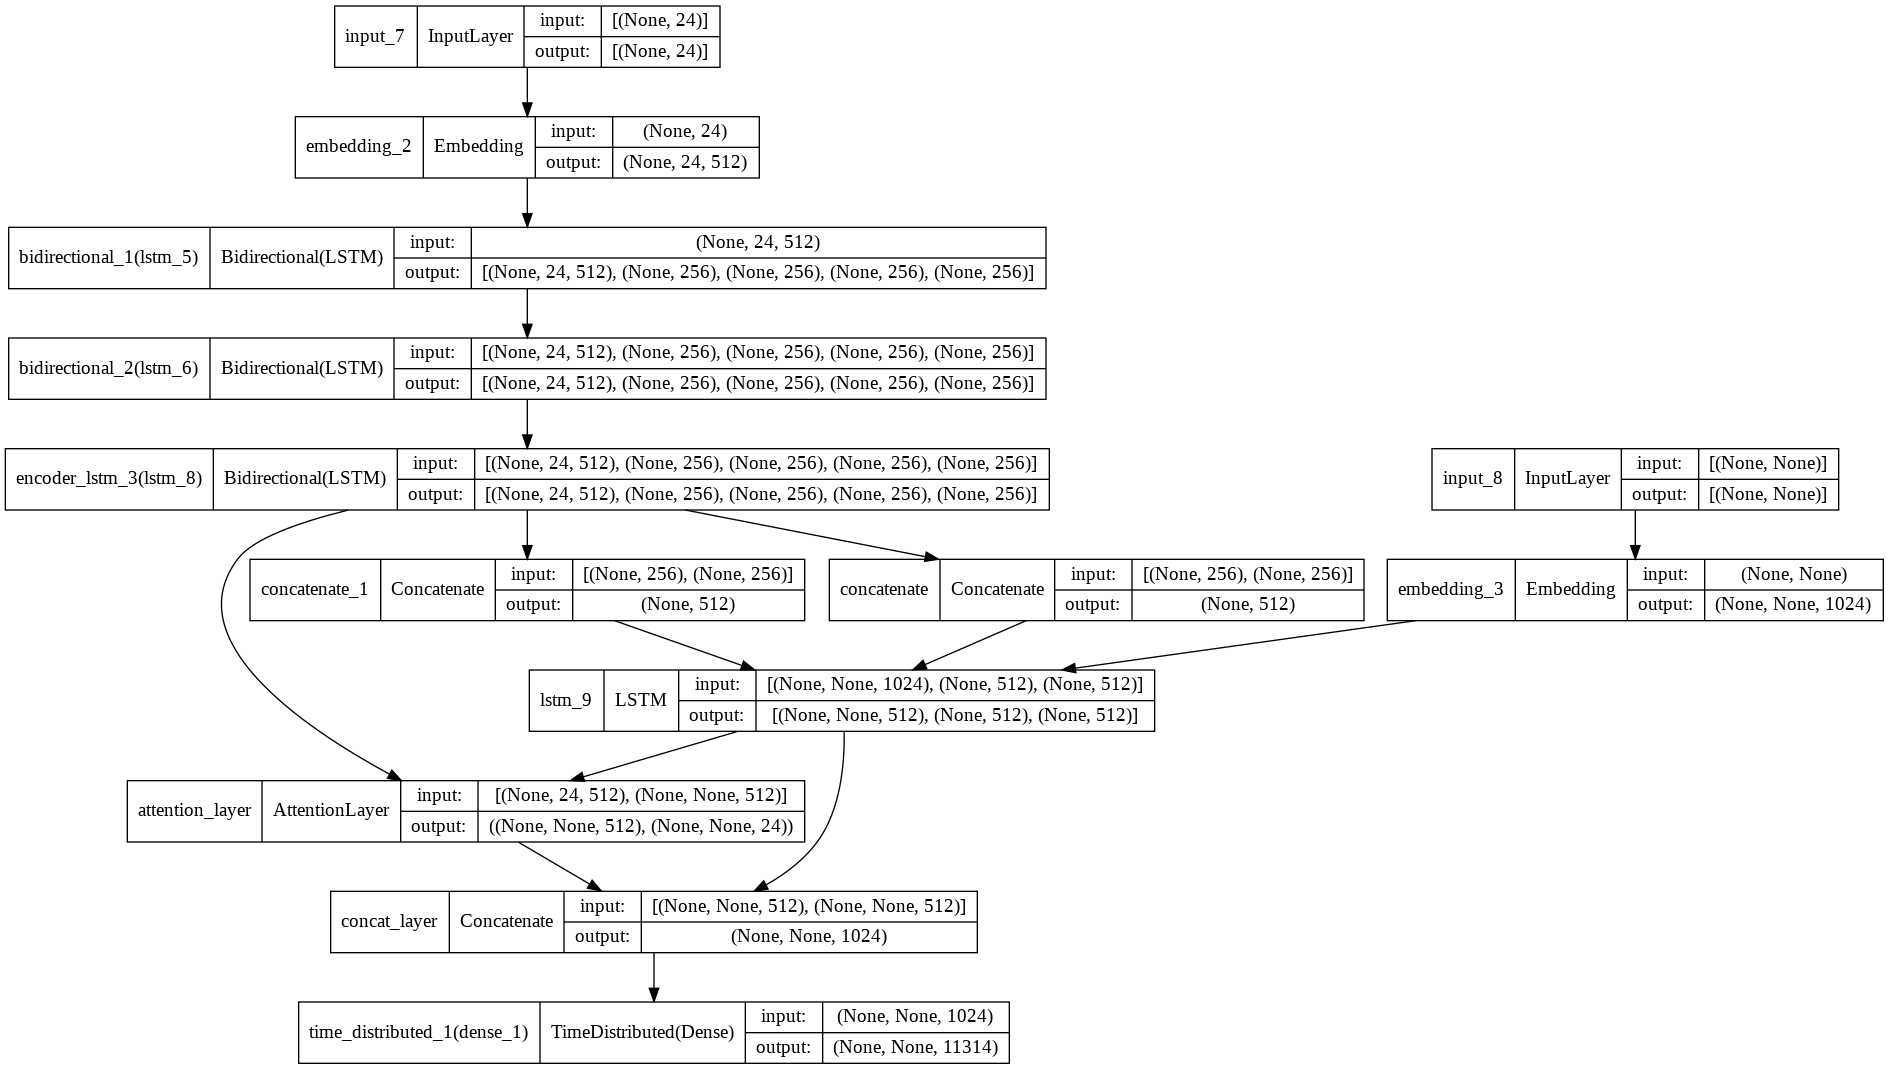

In [114]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB'
)

In [115]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("/content/drive/My Drive/Main/modelnmtbidirectionalattention", monitor='val_accuracy')

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)

callbacks_list = [checkpoint, early_stopping]

In [55]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [116]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]),epochs=100,batch_size=512,callbacks=callbacks_list)

Epoch 1/100
57/57 [==============================] - ETA: 0s - loss: 2.0084 - accuracy: 0.7912INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 94s 1s/step - loss: 2.0084 - accuracy: 0.7912 - val_loss: 1.2027 - val_accuracy: 0.8464
Epoch 2/100
57/57 [==============================] - ETA: 0s - loss: 1.2544 - accuracy: 0.8362INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 78s 1s/step - loss: 1.2544 - accuracy: 0.8362 - val_loss: 1.1353 - val_accuracy: 0.8504
Epoch 3/100
57/57 [==============================] - ETA: 0s - loss: 1.1613 - accuracy: 0.8468INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 78s 1s/step - loss: 1.1613 - accuracy: 0.8468 - val_loss: 1.0807 - val_accuracy: 0.8548
Epoch 4/100
57/57 [==============================] - ETA: 0s - loss: 1.0737 - accuracy: 0.8560INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 78s 1s/step - loss: 1.0737 - accuracy: 0.8560 - val_loss: 1.0421 - val_accuracy: 0.8553
Epoch 5/100
57/57 [==============================] - ETA: 0s - loss: 1.0096 - accuracy: 0.8596INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 79s 1s/step - loss: 1.0096 - accuracy: 0.8596 - val_loss: 1.0054 - val_accuracy: 0.8583
Epoch 6/100
57/57 [==============================] - ETA: 0s - loss: 0.9615 - accuracy: 0.8624INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 78s 1s/step - loss: 0.9615 - accuracy: 0.8624 - val_loss: 0.9803 - val_accuracy: 0.8604
Epoch 7/100
57/57 [==============================] - ETA: 0s - loss: 0.9196 - accuracy: 0.8648INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 79s 1s/step - loss: 0.9196 - accuracy: 0.8648 - val_loss: 0.9554 - val_accuracy: 0.8620
Epoch 8/100
57/57 [==============================] - ETA: 0s - loss: 0.8785 - accuracy: 0.8674INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 77s 1s/step - loss: 0.8785 - accuracy: 0.8674 - val_loss: 0.9296 - val_accuracy: 0.8653
Epoch 9/100
57/57 [==============================] - ETA: 0s - loss: 0.8306 - accuracy: 0.8712INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 78s 1s/step - loss: 0.8306 - accuracy: 0.8712 - val_loss: 0.8944 - val_accuracy: 0.8702
Epoch 10/100
57/57 [==============================] - ETA: 0s - loss: 0.7759 - accuracy: 0.8764INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 78s 1s/step - loss: 0.7759 - accuracy: 0.8764 - val_loss: 0.8574 - val_accuracy: 0.8743
Epoch 11/100
57/57 [==============================] - ETA: 0s - loss: 0.7206 - accuracy: 0.8819INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 78s 1s/step - loss: 0.7206 - accuracy: 0.8819 - val_loss: 0.8241 - val_accuracy: 0.8775
Epoch 12/100
57/57 [==============================] - ETA: 0s - loss: 0.6648 - accuracy: 0.8877INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 78s 1s/step - loss: 0.6648 - accuracy: 0.8877 - val_loss: 0.7890 - val_accuracy: 0.8818
Epoch 13/100
57/57 [==============================] - ETA: 0s - loss: 0.6097 - accuracy: 0.8932INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 78s 1s/step - loss: 0.6097 - accuracy: 0.8932 - val_loss: 0.7551 - val_accuracy: 0.8866
Epoch 14/100
57/57 [==============================] - ETA: 0s - loss: 0.5558 - accuracy: 0.8989INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 78s 1s/step - loss: 0.5558 - accuracy: 0.8989 - val_loss: 0.7295 - val_accuracy: 0.8894
Epoch 15/100
57/57 [==============================] - ETA: 0s - loss: 0.5054 - accuracy: 0.9047INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 78s 1s/step - loss: 0.5054 - accuracy: 0.9047 - val_loss: 0.7059 - val_accuracy: 0.8928
Epoch 16/100
57/57 [==============================] - ETA: 0s - loss: 0.4564 - accuracy: 0.9111INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 80s 1s/step - loss: 0.4564 - accuracy: 0.9111 - val_loss: 0.6819 - val_accuracy: 0.8963
Epoch 17/100
57/57 [==============================] - ETA: 0s - loss: 0.4115 - accuracy: 0.9178INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 78s 1s/step - loss: 0.4115 - accuracy: 0.9178 - val_loss: 0.6653 - val_accuracy: 0.8982
Epoch 18/100
57/57 [==============================] - ETA: 0s - loss: 0.3686 - accuracy: 0.9241INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 79s 1s/step - loss: 0.3686 - accuracy: 0.9241 - val_loss: 0.6500 - val_accuracy: 0.9011
Epoch 19/100
57/57 [==============================] - ETA: 0s - loss: 0.3296 - accuracy: 0.9303INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 79s 1s/step - loss: 0.3296 - accuracy: 0.9303 - val_loss: 0.6345 - val_accuracy: 0.9029
Epoch 20/100
57/57 [==============================] - ETA: 0s - loss: 0.2951 - accuracy: 0.9362INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 79s 1s/step - loss: 0.2951 - accuracy: 0.9362 - val_loss: 0.6197 - val_accuracy: 0.9056
Epoch 21/100
57/57 [==============================] - ETA: 0s - loss: 0.2638 - accuracy: 0.9418INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 79s 1s/step - loss: 0.2638 - accuracy: 0.9418 - val_loss: 0.6119 - val_accuracy: 0.9063
Epoch 22/100
57/57 [==============================] - ETA: 0s - loss: 0.2357 - accuracy: 0.9471INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 78s 1s/step - loss: 0.2357 - accuracy: 0.9471 - val_loss: 0.6051 - val_accuracy: 0.9068
Epoch 23/100
57/57 [==============================] - ETA: 0s - loss: 0.2117 - accuracy: 0.9519INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 79s 1s/step - loss: 0.2117 - accuracy: 0.9519 - val_loss: 0.5973 - val_accuracy: 0.9080
Epoch 24/100
57/57 [==============================] - ETA: 0s - loss: 0.1907 - accuracy: 0.9562INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 77s 1s/step - loss: 0.1907 - accuracy: 0.9562 - val_loss: 0.5910 - val_accuracy: 0.9102
Epoch 25/100
57/57 [==============================] - ETA: 0s - loss: 0.1721 - accuracy: 0.9605INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 78s 1s/step - loss: 0.1721 - accuracy: 0.9605 - val_loss: 0.5847 - val_accuracy: 0.9111
Epoch 26/100
57/57 [==============================] - ETA: 0s - loss: 0.1550 - accuracy: 0.9643INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 78s 1s/step - loss: 0.1550 - accuracy: 0.9643 - val_loss: 0.5812 - val_accuracy: 0.9109
Epoch 27/100
57/57 [==============================] - ETA: 0s - loss: 0.1408 - accuracy: 0.9674INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 79s 1s/step - loss: 0.1408 - accuracy: 0.9674 - val_loss: 0.5815 - val_accuracy: 0.9115
Epoch 28/100
57/57 [==============================] - ETA: 0s - loss: 0.1279 - accuracy: 0.9707INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 78s 1s/step - loss: 0.1279 - accuracy: 0.9707 - val_loss: 0.5795 - val_accuracy: 0.9126
Epoch 29/100
57/57 [==============================] - ETA: 0s - loss: 0.1166 - accuracy: 0.9734INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 79s 1s/step - loss: 0.1166 - accuracy: 0.9734 - val_loss: 0.5800 - val_accuracy: 0.9119
Epoch 30/100
57/57 [==============================] - ETA: 0s - loss: 0.1065 - accuracy: 0.9757INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 78s 1s/step - loss: 0.1065 - accuracy: 0.9757 - val_loss: 0.5763 - val_accuracy: 0.9140
Epoch 31/100
57/57 [==============================] - ETA: 0s - loss: 0.0977 - accuracy: 0.9779INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 78s 1s/step - loss: 0.0977 - accuracy: 0.9779 - val_loss: 0.5786 - val_accuracy: 0.9134
Epoch 32/100
57/57 [==============================] - ETA: 0s - loss: 0.0900 - accuracy: 0.9797INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 78s 1s/step - loss: 0.0900 - accuracy: 0.9797 - val_loss: 0.5756 - val_accuracy: 0.9146
Epoch 33/100
57/57 [==============================] - ETA: 0s - loss: 0.0829 - accuracy: 0.9811INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 80s 1s/step - loss: 0.0829 - accuracy: 0.9811 - val_loss: 0.5802 - val_accuracy: 0.9136
Epoch 34/100
57/57 [==============================] - ETA: 0s - loss: 0.0764 - accuracy: 0.9829INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 78s 1s/step - loss: 0.0764 - accuracy: 0.9829 - val_loss: 0.5791 - val_accuracy: 0.9141
Epoch 35/100
57/57 [==============================] - ETA: 0s - loss: 0.0710 - accuracy: 0.9841INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 78s 1s/step - loss: 0.0710 - accuracy: 0.9841 - val_loss: 0.5798 - val_accuracy: 0.9136
Epoch 36/100
57/57 [==============================] - ETA: 0s - loss: 0.0663 - accuracy: 0.9849INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 78s 1s/step - loss: 0.0663 - accuracy: 0.9849 - val_loss: 0.5789 - val_accuracy: 0.9153
Epoch 37/100
57/57 [==============================] - ETA: 0s - loss: 0.0623 - accuracy: 0.9859INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 78s 1s/step - loss: 0.0623 - accuracy: 0.9859 - val_loss: 0.5803 - val_accuracy: 0.9156
Epoch 38/100
57/57 [==============================] - ETA: 0s - loss: 0.0581 - accuracy: 0.9870INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 79s 1s/step - loss: 0.0581 - accuracy: 0.9870 - val_loss: 0.5859 - val_accuracy: 0.9145
Epoch 39/100
57/57 [==============================] - ETA: 0s - loss: 0.0543 - accuracy: 0.9877INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 78s 1s/step - loss: 0.0543 - accuracy: 0.9877 - val_loss: 0.5868 - val_accuracy: 0.9145
Epoch 40/100
57/57 [==============================] - ETA: 0s - loss: 0.0508 - accuracy: 0.9888INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 80s 1s/step - loss: 0.0508 - accuracy: 0.9888 - val_loss: 0.5914 - val_accuracy: 0.9148
Epoch 41/100
57/57 [==============================] - ETA: 0s - loss: 0.0482 - accuracy: 0.9894INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 78s 1s/step - loss: 0.0482 - accuracy: 0.9894 - val_loss: 0.5886 - val_accuracy: 0.9161
Epoch 42/100
57/57 [==============================] - ETA: 0s - loss: 0.0456 - accuracy: 0.9899INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 79s 1s/step - loss: 0.0456 - accuracy: 0.9899 - val_loss: 0.5907 - val_accuracy: 0.9153
Epoch 43/100
57/57 [==============================] - ETA: 0s - loss: 0.0432 - accuracy: 0.9903INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 78s 1s/step - loss: 0.0432 - accuracy: 0.9903 - val_loss: 0.5915 - val_accuracy: 0.9158
Epoch 44/100
57/57 [==============================] - ETA: 0s - loss: 0.0407 - accuracy: 0.9909INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 78s 1s/step - loss: 0.0407 - accuracy: 0.9909 - val_loss: 0.5927 - val_accuracy: 0.9161
Epoch 45/100
57/57 [==============================] - ETA: 0s - loss: 0.0385 - accuracy: 0.9915INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 78s 1s/step - loss: 0.0385 - accuracy: 0.9915 - val_loss: 0.5979 - val_accuracy: 0.9151
Epoch 46/100
57/57 [==============================] - ETA: 0s - loss: 0.0369 - accuracy: 0.9917INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/modelnmtbidirectionalattention/assets


57/57 [==============================] - 78s 1s/step - loss: 0.0369 - accuracy: 0.9917 - val_loss: 0.5994 - val_accuracy: 0.9143


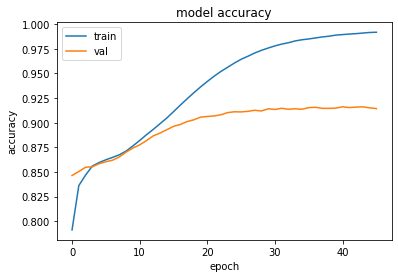

In [117]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

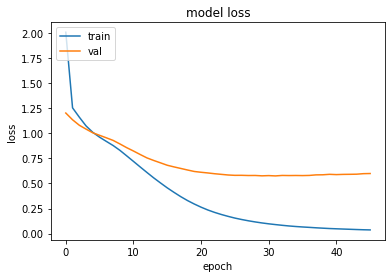

In [118]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save ("/content/drive/My Drive/Main/modelnmat.h5")

In [ ]:
from keras import models    
model = models.load_model("/content/drive/My Drive/Main/modelnmt")

In [119]:
from keras.utils.vis_utils import plot_model
import tensorflow as tf

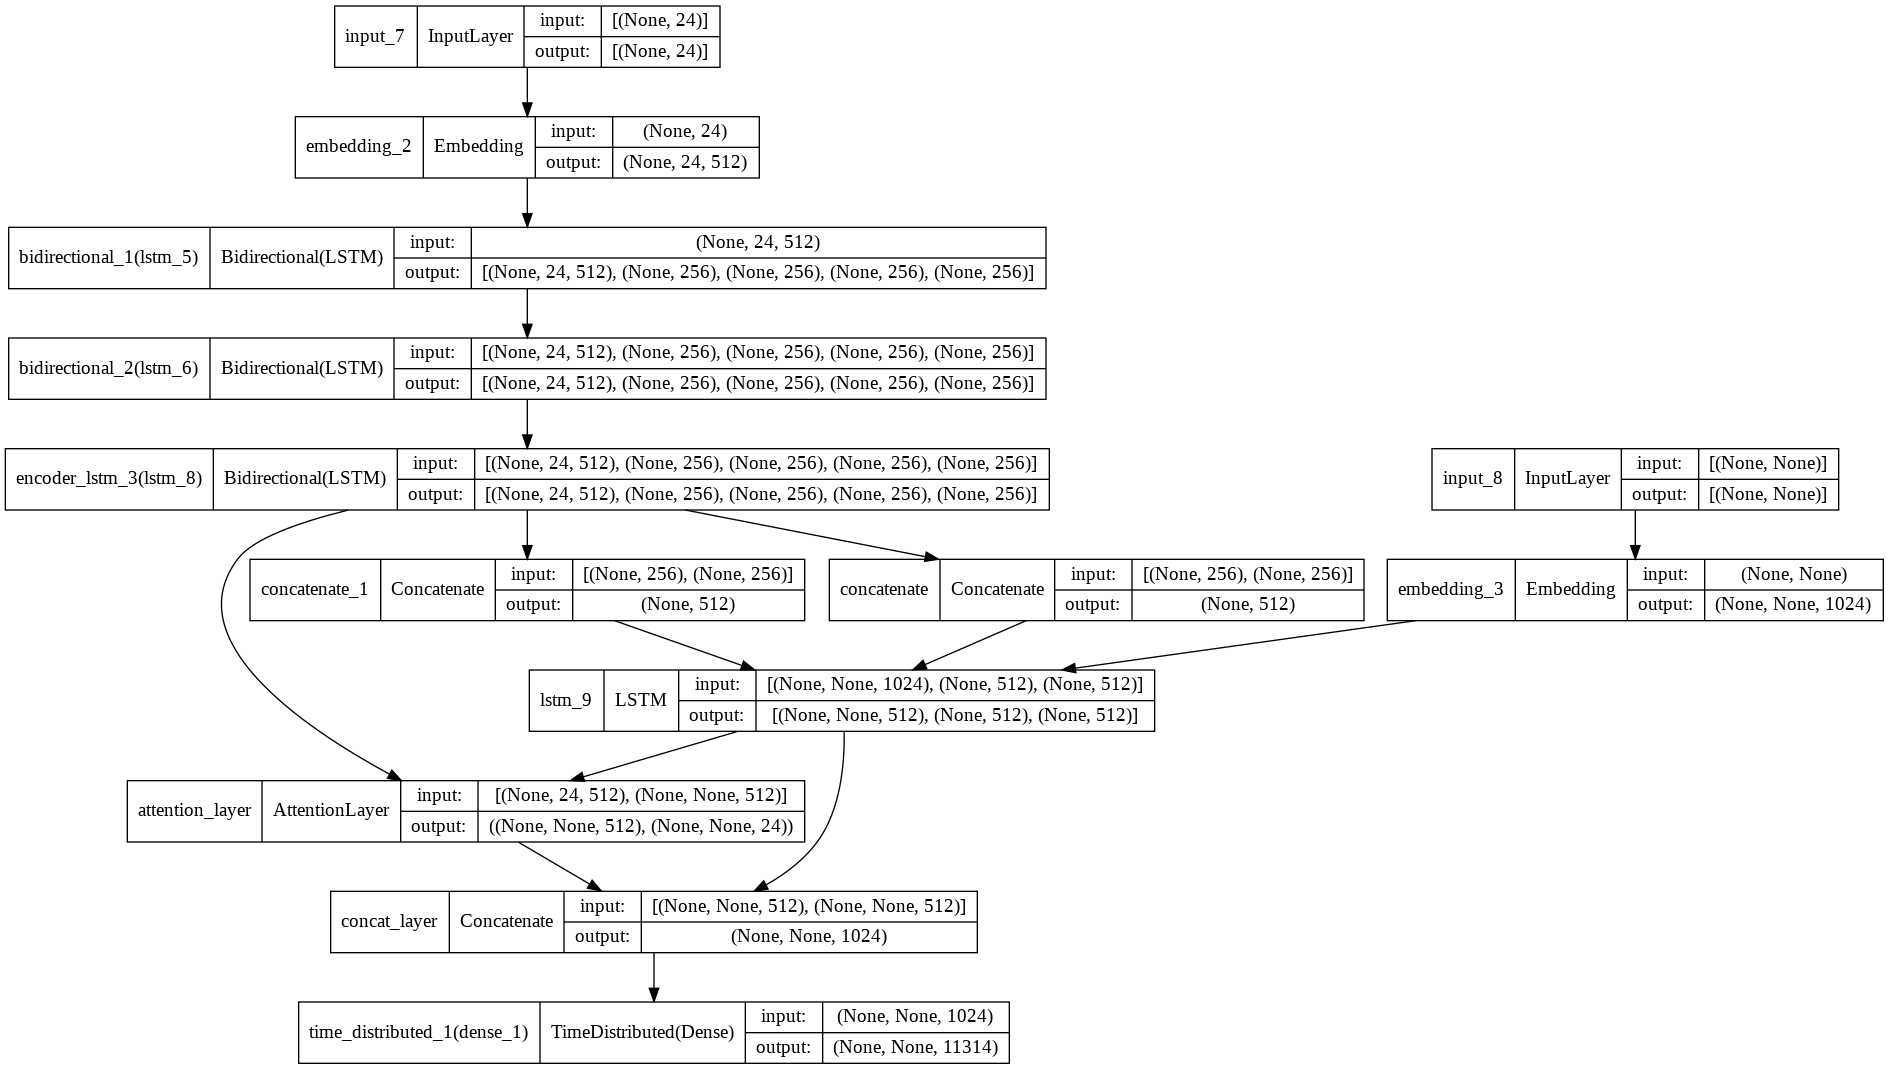

In [120]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB'
)

In [132]:
y_tokens

In [146]:
reverse_target_word_index=y_tokens.index_word
len(reverse_target_word_index)

11313

In [134]:
x_tokens.index_word

{}

In [147]:
reverse_source_word_index=x_tokens.index_word
len(reverse_source_word_index)

5569

In [148]:
target_word_index=y_tokens.word_index
len(target_word_index)

11313

In [149]:

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=[encoder_inputs],outputs=[encoder_outputs, state_h, state_c])
encoder_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 24)]         0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 24, 512)      2851840     ['input_7[0][0]']                
                                                                                                  
 bidirectional_1 (Bidirectional  [(None, 24, 512),   1574912     ['embedding_2[0][0]']            
 )                               (None, 256),                                                     
                                 (None, 256),                                                     
                                 (None, 256),                                               

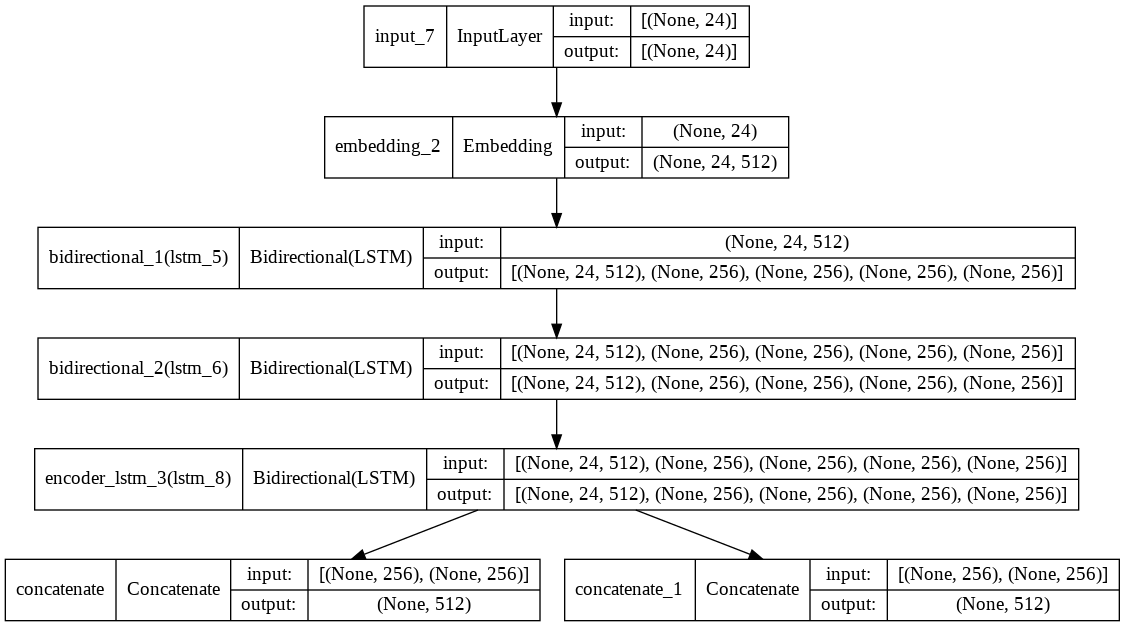

In [150]:
tf.keras.utils.plot_model(
    encoder_model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB'
)

In [167]:
# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(512,))
decoder_state_input_c = Input(shape=(512,))
encoder_inf_states=Input(shape=(trmaxlen_english,512,))
decoder_hidden_state_input = Input(shape=(trmaxlen_english,512))
print(decoder_inputs.get_shape)
#print(dec_emb.get_shape)

<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, None) dtype=float32 (created by layer 'input_8')>>


In [168]:
dec_states = [decoder_state_input_h, decoder_state_input_c]

In [169]:

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=dec_states)
attn_inf_out, attn_inf_states = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_inf_out])

In [170]:

dec_states2= [state_h2, state_c2]

decoder_outputs2 = decoder_dense(decoder_inf_concat)

In [171]:
decoder_model= Model(
                    [decoder_inputs] + [decoder_hidden_state_input, decoder_state_input_h, decoder_state_input_c],
                     [decoder_outputs2]+ dec_states2)

In [172]:
decoder_model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding_3 (Embedding)        (None, None, 1024)   11585536    ['input_8[0][0]']                
                                                                                                  
 input_13 (InputLayer)          [(None, 512)]        0           []                               
                                                                                                  
 input_14 (InputLayer)          [(None, 512)]        0           []                               
                                                                                            

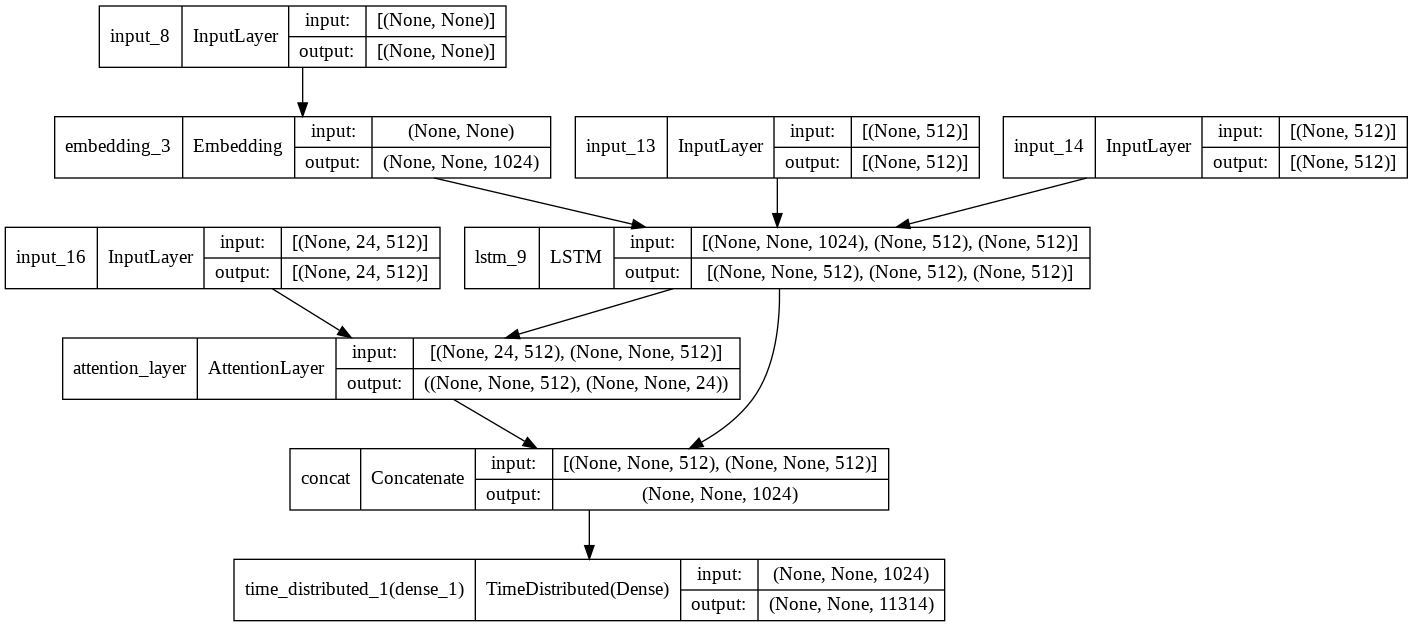

In [173]:
tf.keras.utils.plot_model(
    decoder_model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB'
)

In [174]:
def decode_sequence(input_seq):

    # Encode the input as state vectors.
    enc_output, enc_h, enc_c   = encoder_model.predict([input_seq])
    

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sos']

    stop_condition = False
    decoded_sentence = ''
    attention_weights=[]
    while not stop_condition:
      
        output_tokens, h, c  = decoder_model.predict([target_seq] + [enc_output, enc_h, enc_c ])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        if sampled_token_index == 0:
            break
        else:
            sampled_token = reverse_target_word_index[sampled_token_index]
        #attention_weights.append((sampled_token_index, attention))
        if(sampled_token!='eos'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eos'  or len(decoded_sentence.split()) >= (trmaxlen_malayalam -1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        enc_h, enc_c = h, c

    return decoded_sentence

In [175]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sos']) and i!=target_word_index['eos']):
            #print(i)
            newString=newString+reverse_target_word_index[i]+' '
            #print(newString)
    return newString

In [176]:
def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [177]:
seq2summary(x_tr[1])

'സ്ത്രീയുടെ വെളുത്ത വ്യക്തി കുറ്റിച്ചെടി പൂക്കൾ '

In [178]:
for i in range(25):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,trmaxlen_english)))
    print("\n")

Review: male surfer surfing in still in the ocean 
Original summary: ശാന്തമായ കടലിൽ സർഫിങ് നടത്തുന്ന പുരുഷ സർഫർ 
Predicted summary:  ശാന്തമായ കടലിൽ സർഫിങ് നടത്തുന്ന പുരുഷ സർഫർ


Review: it is an indoor scene 
Original summary: ഇത് ഒരു ഇൻഡോർ രംഗമാണ് 
Predicted summary:  ഇത് ഒരു ഇൻഡോർ രംഗമാണ്


Review: computer screens turned on 
Original summary: കമ്പ്യൂട്ടർ സ്ക്രീനുകൾ ഓണാക്കി 
Predicted summary:  കമ്പ്യൂട്ടർ സ്ക്രീനുകൾ ഓണാക്കി


Review: man has short hair 
Original summary: മനുഷ്യന് ചെറിയ മുടിയുണ്ട് 
Predicted summary:  ദ്വീപ് ബീച്ച് രംഗം


Review: photo album open on an adults lap 
Original summary: ഫോട്ടോ ആൽബം മുതിർന്നവരുടെ മടിയിൽ തുറക്കുന്നു 
Predicted summary:  ഫോട്ടോ ആൽബം മുതിർന്നവരുടെ മടിയിൽ തുറക്കുന്നു


Review: there is a group of girls beside the black car 
Original summary: കറുത്ത കാറിനടുത്ത് ഒരു കൂട്ടം പെൺകുട്ടികളുണ്ട് 
Predicted summary:  ഒരു കറുത്ത ട്രാഷ് ബാഗ്


Review: child in a stroller 
Original summary: ഒരു ഉന്തുവണ്ടിയിലെ കുട്ടി 
Predicted summary:  ഒരു ഉന്തുവണ്ടിയിലെ

In [179]:
for i in range(25):
    print("Review:",seq2text(x_val[i]))
    print("Original summary:",seq2summary(y_val[i]))
    print("Predicted summary:",decode_sequence(x_val[i].reshape(1,trmaxlen_english)))
    print("\n")

Review: a cloudy blue sky 
Original summary: തെളിഞ്ഞ നീലാകാശം 
Predicted summary:  തെളിഞ്ഞ നീലാകാശം


Review: window of a building 
Original summary: ഒരു കെട്ടിടത്തിന്റെ വിൻഡോ 
Predicted summary:  ഒരു കെട്ടിടത്തിലെ വലിയ വിൻഡോ


Review: a dark grey computer desk with drawers 
Original summary: ഇരുണ്ട ചാരനിറത്തിലുള്ള കമ്പ്യൂട്ടർ ഡെസ്ക് 
Predicted summary:  ഇരുണ്ട ചാരനിറത്തിലുള്ള എസ്‌യുവി


Review: four legged steel chair on ground 
Original summary: നിലത്ത് നാല് കാലുകളുള്ള ഉരുക്ക് കസേര 
Predicted summary:  നിലത്ത് കറുത്ത പുള്ളി


Review: man riding a bicycle down a street 
Original summary: തെരുവിൽ സൈക്കിൾ ചവിട്ടുന്ന മനുഷ്യൻ 
Predicted summary:  തെരുവിലൂടെ സൈക്കിൾ ഓടിക്കുന്ന മനുഷ്യൻ


Review: these cars are parked on the dirt 
Original summary: ഈ കാറുകൾ അഴുക്കിൽ പാർക്ക് ചെയ്തിരിക്കുന്നു 
Predicted summary:  ഈ തെരുവ് അടയാളങ്ങൾ ഉപയോഗിക്കുന്ന ടാക്സി അടയാളങ്ങൾ


Review: white clouds in the sky 
Original summary: ആകാശത്ത് വെളുത്ത മേഘങ്ങൾ 
Predicted summary:  ഒരു കെട്ടിടത്തിലെ വലിയ വിൻഡോ


Rev

In [180]:
#error due to probelm in test data
for i in range(25):
    print("Review:",seq2text(x_tt[i]))
    print("Original summary:",seq2summary(y_tt[i]))
    print("Predicted summary:",decode_sequence(x_tt[i].reshape(1,trmaxlen_english)))
    print("\n")

Review: hanging red palm tennis 
Original summary: കളിക്കാരൻ പച്ച പിച്ചർ കെട്ടിടത്തിലെ 
Predicted summary:  ടെന്നീസ് ലോഗോ


Review: bowl red plane on plaid green bathroom white ball 
Original summary: കഴുത്ത് മുറിയിലെ രംഗം ഘടികാരം പച്ച 
Predicted summary:  ചുവപ്പും വെള്ളയും പന്ത് വായുവിൽ പറക്കുന്നു


Review: the with frame white the tarmac 
Original summary: ഘടിപ്പിച്ചിരിക്കുന്നു വെളുത്ത കുതിരകൾ 
Predicted summary:  ചാരനിറത്തിലുള്ള റോഡിന്റെ വശങ്ങളിൽ പച്ച പുല്ലിന്റെ സ്ട്രിപ്പുകൾ


Review: coat print luggage hand yellow with cake 
Original summary: സർഫ് അകലെ സോസ് വ്യക്തി പെയിന്റ് ഗ്ലാസ് 
Predicted summary:  മഞ്ഞ നിറത്തിലുള്ള എഴുത്ത് ഉള്ള അമ്മ വ്യക്തി


Review: door nose green object room with plate 
Original summary: പയ്യൻ സ്കീസ് തവിട്ടുനിറത്തിലുള്ള തെരുവിൽ വ്യക്തി ഫോട്ടോ 
Predicted summary:  ഏഷ്യൻ പാത്രത്തിൽ ഇരുണ്ട പച്ച അഗ്നി ജലാംശം


Review: colorful on a with boat of a vehicle 
Original summary: ആൻഡ് വെളുത്ത മേശപ്പുറത്ത് പിന്നിൽ 
Predicted summary:  ഒരു തുറന്ന ട്രക്കിന്റെ തുറന്ന പൂക്ക

In [181]:
!pip install sacrebleu
import sacrebleu
import random

In [182]:
temp_o=[]
temp_p=[]
for i in range(1500):
    s=random.randint(0,len(y_tr)-1)
    temp_o.append(seq2summary(y_tr[s]))
    temp_p.append(decode_sequence(x_tr[s].reshape(1,trmaxlen_english)))

bleu = sacrebleu.corpus_bleu(temp_o, [temp_p],lowercase=True, tokenize='intl')
print(bleu.score)

90.53118170300088


In [183]:
temp_o=[]
temp_p=[]
for i in range(998):
    s=random.randint(0,len(y_val)-1)
    temp_o.append(seq2summary(y_val[s]))
    temp_p.append(decode_sequence(x_val[s].reshape(1,trmaxlen_english)))


bleu = sacrebleu.corpus_bleu(temp_o, [temp_p],lowercase=True, tokenize='intl')
print(bleu.score)

20.85683252976381


In [184]:
temp_o=[]
temp_p=[]
for i in range(1400):
    s=random.randint(0,len(y_tt)-1)
    temp_o.append(seq2summary(y_tt[s]))
    temp_p.append(decode_sequence(x_tt[s].reshape(1,trmaxlen_english)))
bleu = sacrebleu.corpus_bleu(temp_o, [temp_p],lowercase=True, tokenize='intl')
print(bleu.score)

0.08566726151853855
